# Portfolio Analysis Problem Set: Question 2

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from itertools import product

In [2]:
YEAR = 2012

df = pd.read_csv('{}_data.csv'.format(YEAR), index_col=0)
securities = df.loc[:, 'Agric':'Other']
market = df.loc[:, 'SP500']
interest = df.loc[:, 'LIBOR']

m = securities.mean()
cov = securities.cov()

## Part (a)

In [3]:
def g_k(w, k):
    w_ = w.copy()
    w_[np.argsort(np.abs(w))[:len(w) - k]] = 0
    if np.sum(w_) <= 0:
        raise ValueError('Sum of new weights is non-positive.')
    return w_ / np.sum(np.abs(w_))


def sparsify(w, p=2):
    difference = np.zeros(48)
    
    for k in range(48):
        try:
            difference[k] = np.linalg.norm(w - g_k(w, k), ord=p)
        except ValueError:
            difference[k] = np.inf

    k = np.argmin(difference)
    return g_k(w, k)

In [4]:
# Horribly copying and pasting... for 2012.

w_naive = np.array([1/48 for _ in range(48)])

w1 = np.array([-0.06634984,  0.14648877,  0.05681786,  0.05349698,  0.0026519 ,
                0.06724858, -0.00602905, -0.00640535,  0.01845041, -0.04219628,
                0.11891252,  0.02538474, -0.06259464, -0.02377737, -0.00745013,
               -0.01836223, -0.06759266, -0.12216697, -0.0811537 ,  0.02818942,
                0.01513216,  0.0418112 , -0.15652095, -0.01428844, -0.00500025,
               -0.01924709, -0.00836351,  0.02574393,  0.00578478, -0.13477667,
                0.38291068, -0.11017488, -0.03700678,  0.28480994,  0.03781101,
               -0.0621996 ,  0.06381632, -0.01214917,  0.07144761, -0.08246253,
                0.26549562,  0.02300848,  0.11167672,  0.41730126,  0.03301756,
               -0.00633342, -0.20086433,  0.0560574 ])

w2 = np.array([-0.06329698,  0.14503418,  0.05882126,  0.05495329,  0.00468359,
                0.06860384, -0.011054  , -0.0045773 ,  0.01644968, -0.03729027,
                0.12709864,  0.01747002, -0.06198006, -0.02512787, -0.00954055,
               -0.01340454, -0.06356127, -0.11827195, -0.08499797,  0.02835199,
                0.027396  ,  0.03244625, -0.14948289, -0.01851856, -0.00357449,
               -0.01419303, -0.00626643,  0.02313587,  0.00654416, -0.13946022,
                0.36456394, -0.115723  , -0.04012527,  0.28887129,  0.03658631,
               -0.07474317,  0.06904188, -0.01728512,  0.0744522 , -0.08680438,
                0.26163374,  0.01318518,  0.11584303,  0.4622982 ,  0.03500753,
               -0.00387219, -0.20886169,  0.03954114])

w3 = np.array([-0.06085469,  0.1438705 ,  0.06042397,  0.05611835,  0.00630895,
                0.06968805, -0.01507396, -0.00311485,  0.01484909, -0.03336546,
                0.13364754,  0.01113824, -0.06148839, -0.02620827, -0.01121289,
               -0.0094384 , -0.06033615, -0.11515593, -0.08807339,  0.02848205,
                0.03720707,  0.0249543 , -0.14385245, -0.02190265, -0.00243388,
               -0.01014977, -0.00458877,  0.02104943,  0.00715167, -0.14320706,
                0.34988654, -0.1201615 , -0.04262007,  0.29212038,  0.03560654,
               -0.08477802,  0.07322232, -0.02139389,  0.07685587, -0.09027786,
                0.25854424,  0.00532653,  0.11917607,  0.49829576,  0.0365995 ,
               -0.0019032 , -0.21525958,  0.02632813])

w_M = np.array([ 0.12598535,  0.05484727,  0.18303473,  0.14524712,  0.13065161,
                 0.15263203, -0.32260865,  0.10876468, -0.10759895,  0.26689006,
                 0.63465078, -0.47325492, -0.02387494, -0.10886085, -0.13914989,
                 0.29397942,  0.1863912 ,  0.12322536, -0.32334876,  0.0384319 ,
                 0.78777291, -0.54819474,  0.28688745, -0.28079226,  0.08482491,
                 0.29916696,  0.12375561, -0.13856771,  0.05362688, -0.42984744,
                -0.77296244, -0.45971495, -0.23347675,  0.54068166, -0.03934731,
                -0.85246364,  0.39303442, -0.33572233,  0.26074124, -0.3560059 ,
                 0.02219128, -0.59587498,  0.37416058,  3.25217809,  0.15838841,
                 0.14872823, -0.70471037, -0.98449238])

w_mvp = np.array([-1.26500894e-02,  2.66598219e-02,  9.72380217e-03,  9.25872757e-03,
                  -1.16132957e-05,  1.17528890e-02,  1.23888775e-04, -1.58945936e-03,
                   3.79431494e-03, -8.75696254e-03,  1.93916802e-02,  6.46003010e-03,
                  -1.13900675e-02, -3.94627209e-03, -8.36081630e-04, -4.48859411e-03,
                  -1.31083037e-02, -2.28775162e-02, -1.36526122e-02,  5.02399100e-03,
                  -2.27336395e-04,  9.75862117e-03, -2.98025597e-02, -1.55044204e-03,
                  -1.24048289e-03, -4.67066985e-03, -2.00576799e-03,  5.25013683e-03,
                   8.56624264e-04, -2.30821528e-02,  7.31796858e-02, -1.84558558e-02,
                  -5.89778602e-03,  5.01786915e-02,  7.08526122e-03, -8.15915810e-03,
                   1.02069695e-02, -9.48671859e-04,  1.21109775e-02, -1.37681938e-02,
                   4.86124744e-02,  6.49158687e-03,  1.90574412e-02,  6.41443731e-02,
                   5.45231189e-03, -1.72860192e-03, -3.41561812e-02,  1.40347509e-02])

portfolios = [w_naive, w1, w2, w3, w_M, w_mvp]

In [5]:
S1_portfolios = [sparsify(w, p=1) for w in portfolios]
S2_portfolios = [sparsify(w, p=2) for w in portfolios]

S1_means = [m @ w for w in S1_portfolios]
S2_means = [m @ w for w in S2_portfolios]
S1_vols = [w.T @ cov @ w for w in S1_portfolios]
S2_vols = [w.T @ cov @ w for w in S2_portfolios]
S1_sharpes = [m / v for m, v in zip(S1_means, S1_vols)]
S2_sharpes = [m / v for m, v in zip(S2_means, S2_vols)]

print('0-norm of S1-sparsified portfolios:', list(map(lambda x: (x != 0).sum(), S1_portfolios)))
print('0-norm of S2-sparsified portfolios:', list(map(lambda x: (x != 0).sum(), S2_portfolios)))
print('rho of S1-sparsified portfolios:', np.round(S1_means, 2))
print('rho of S2-sparsified portfolios:', np.round(S2_means, 2))
print('sigma of S1-sparsified portfolios:', np.round(S1_vols, 2))
print('sigma of S2-sparsified portfolios:', np.round(S2_vols, 2))
print('Sharpes of S1-sparsified portfolios:', np.round(S1_sharpes, 2))
print('Sharpes of S2-sparsified portfolios:', np.round(S2_sharpes, 2))

0-norm of S1-sparsified portfolios: [47, 28, 17, 3, 1, 47]
0-norm of S2-sparsified portfolios: [47, 5, 5, 5, 1, 47]
rho of S1-sparsified portfolios: [0.08 0.03 0.04 0.09 0.14 0.02]
rho of S2-sparsified portfolios: [0.08 0.06 0.07 0.07 0.14 0.02]
sigma of S1-sparsified portfolios: [0.87 0.01 0.02 0.47 0.54 0.01]
sigma of S2-sparsified portfolios: [0.87 0.25 0.24 0.24 0.54 0.01]
Sharpes of S1-sparsified portfolios: [0.09 1.93 1.74 0.19 0.26 1.62]
Sharpes of S2-sparsified portfolios: [0.09 0.26 0.27 0.28 0.26 1.62]


## Part (b)

In [6]:
def sparsify2(rho, tau):
    fun = lambda w: np.sum(np.square(rho*np.ones(250) - securities @ w)) + tau * np.sum(np.abs(w))

    # Constraints of the form c(x) = 0
    cons = ({'type': 'eq', 'fun': lambda w: w @ m - rho},
            {'type': 'eq', 'fun': lambda w: np.sum(w) - 1})

    # scipy.optimize.minimize using sequential least squares programming
    res = minimize(fun=fun,
                   x0=np.random.randn(48),
                   method='SLSQP',
                   constraints=cons,
                   options={'maxiter': 300})

    if res.status:
        raise ValueError(f'Optimization failed: {res.message}. (rho = {rho}, tau = {tau})')
        
    return res.x

In [7]:
rhos = [i/10 for i in range(1, 5)]
taus = [0.1, 0.2, 0.5, 1, 2, 5, 10, 20, 50]

vols = pd.DataFrame(data=-np.ones([len(rhos), len(taus)]),
                    index=rhos,
                    columns=taus)

for rho, tau in product(rhos, taus):
    try:
        w = sparsify2(rho, tau)
        vols.loc[rho, tau] = w.T @ cov @ w
    except ValueError as e:
        print(e)

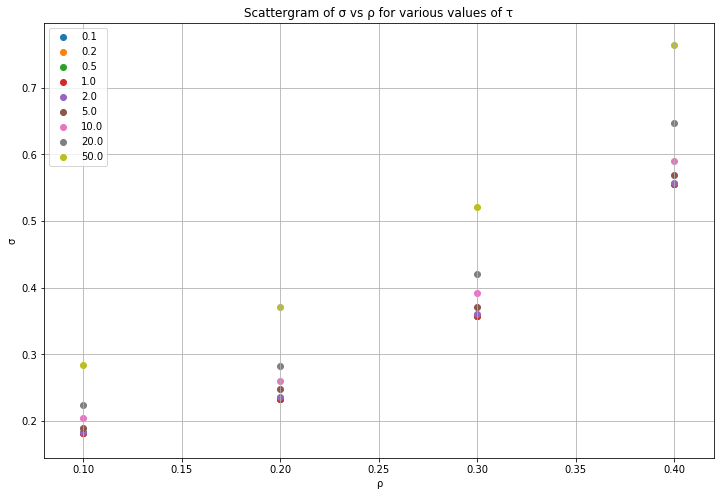

In [8]:
# I know sigma should be on the x axis but the way my data is structured makes that hard. Sorry.
fig, ax = plt.subplots(figsize=[12, 8])
for v in vols.columns:
    plt.scatter(vols.index, vols.loc[:, v])
plt.xlabel('ρ')
plt.ylabel('σ')
plt.title('Scattergram of σ vs ρ for various values of τ')
plt.legend()
plt.grid(True)